In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler

In [4]:
file_path = r'C:\Users\paton\Downloads\Medicaldataset.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
df['Result'] = df['Result'].map({'negative':0,'positive':1})
features = ['Age','Gender','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar']

In [7]:
X = df[['Age','Gender','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar']]
y = df['Result']

In [8]:
scaler = RobustScaler()

In [15]:
X_cleaned = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
print (accuracy_score(y_test,y_pred))

0.6515151515151515


In [31]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39       101
           1       0.67      0.88      0.76       163

    accuracy                           0.65       264
   macro avg       0.63      0.58      0.57       264
weighted avg       0.64      0.65      0.62       264



In [39]:
coefficients = pd.Series(model.coef_[0], index=features)
print("Feature Coefficients:")
print(coefficients.sort_values(ascending = False))

Feature Coefficients:
Age                         0.722254
Gender                      0.641191
Diastolic blood pressure    0.061107
Heart rate                  0.003390
Blood sugar                -0.069734
Systolic blood pressure    -0.098248
dtype: float64


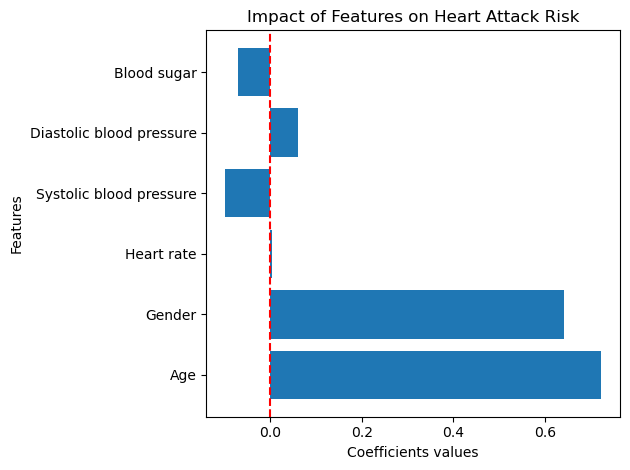

In [41]:
plt.barh(features,coefficients)
plt.title("Impact of Features on Heart Attack Risk")
plt.xlabel('Coefficients values')
plt.ylabel('Features')
plt.axvline(x=0, color='r',linestyle='--')
plt.tight_layout()
plt.show()